In [21]:
import pandas as pd
import numpy as np

In [22]:
df=pd.read_csv("C:\\Users\\adhil\\OneDrive\\Desktop\\machineworks\\FEATURENGINEERING\\loanPrediction\\5_6062406197263211278.csv")

In [23]:
df.shape

(4269, 13)

In [24]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [25]:
df.tail()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,4269,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


In [26]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [27]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [28]:
df.drop(columns=("loan_id"),inplace=True)

In [29]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer([("encoder",OneHotEncoder(),[1,2])],remainder="passthrough")
X=pd.DataFrame(ct.fit_transform(X))

In [31]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,0.0,1.0,0.0,2.0,9600000.0,29900000.0,12.0,778.0,2400000.0,17600000.0,22700000.0,8000000.0
1,0.0,1.0,0.0,1.0,0.0,4100000.0,12200000.0,8.0,417.0,2700000.0,2200000.0,8800000.0,3300000.0
2,1.0,0.0,1.0,0.0,3.0,9100000.0,29700000.0,20.0,506.0,7100000.0,4500000.0,33300000.0,12800000.0
3,1.0,0.0,1.0,0.0,3.0,8200000.0,30700000.0,8.0,467.0,18200000.0,3300000.0,23300000.0,7900000.0
4,0.0,1.0,0.0,1.0,5.0,9800000.0,24200000.0,20.0,382.0,12400000.0,8200000.0,29400000.0,5000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,1.0,0.0,0.0,1.0,5.0,1000000.0,2300000.0,12.0,317.0,2800000.0,500000.0,3300000.0,800000.0
4265,0.0,1.0,0.0,1.0,0.0,3300000.0,11300000.0,20.0,559.0,4200000.0,2900000.0,11000000.0,1900000.0
4266,0.0,1.0,1.0,0.0,2.0,6500000.0,23900000.0,18.0,457.0,1200000.0,12400000.0,18100000.0,7300000.0
4267,0.0,1.0,1.0,0.0,1.0,4100000.0,12800000.0,8.0,780.0,8200000.0,700000.0,14100000.0,5800000.0


In [32]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,0.0,1.0,0.0,2.0,9600000.0,29900000.0,12.0,778.0,2400000.0,17600000.0,22700000.0,8000000.0
1,0.0,1.0,0.0,1.0,0.0,4100000.0,12200000.0,8.0,417.0,2700000.0,2200000.0,8800000.0,3300000.0
2,1.0,0.0,1.0,0.0,3.0,9100000.0,29700000.0,20.0,506.0,7100000.0,4500000.0,33300000.0,12800000.0
3,1.0,0.0,1.0,0.0,3.0,8200000.0,30700000.0,8.0,467.0,18200000.0,3300000.0,23300000.0,7900000.0
4,0.0,1.0,0.0,1.0,5.0,9800000.0,24200000.0,20.0,382.0,12400000.0,8200000.0,29400000.0,5000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,1.0,0.0,0.0,1.0,5.0,1000000.0,2300000.0,12.0,317.0,2800000.0,500000.0,3300000.0,800000.0
4265,0.0,1.0,0.0,1.0,0.0,3300000.0,11300000.0,20.0,559.0,4200000.0,2900000.0,11000000.0,1900000.0
4266,0.0,1.0,1.0,0.0,2.0,6500000.0,23900000.0,18.0,457.0,1200000.0,12400000.0,18100000.0,7300000.0
4267,0.0,1.0,1.0,0.0,1.0,4100000.0,12800000.0,8.0,780.0,8200000.0,700000.0,14100000.0,5800000.0


In [33]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y=le.fit_transform(Y)
Y


array([0, 1, 1, ..., 1, 0, 0], shape=(4269,))

In [34]:
# train 
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=42)
xtrain

,0,1,2,3,4,5,6,7,8,9,10,11,12
1675,0.0,1.0,1.0,0.0,5.0,7900000.0,29900000.0,6.0,568.0,5800000.0,13900000.0,15900000.0,8700000.0
1164,0.0,1.0,0.0,1.0,0.0,9600000.0,34000000.0,12.0,710.0,23800000.0,10300000.0,38100000.0,7800000.0
192,1.0,0.0,1.0,0.0,1.0,800000.0,2900000.0,8.0,682.0,2200000.0,1100000.0,2900000.0,700000.0
910,1.0,0.0,0.0,1.0,2.0,4900000.0,13100000.0,18.0,754.0,8200000.0,3300000.0,16500000.0,7200000.0
567,1.0,0.0,0.0,1.0,5.0,3000000.0,11100000.0,12.0,441.0,8500000.0,2500000.0,7300000.0,2000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,1.0,0.0,0.0,1.0,0.0,1300000.0,4700000.0,16.0,530.0,3200000.0,1000000.0,3800000.0,800000.0
466,0.0,1.0,0.0,1.0,5.0,500000.0,1800000.0,18.0,411.0,1000000.0,500000.0,1300000.0,200000.0
3092,0.0,1.0,0.0,1.0,4.0,8600000.0,20600000.0,16.0,449.0,10800000.0,10600000.0,28700000.0,5400000.0
3772,0.0,1.0,0.0,1.0,2.0,7000000.0,21400000.0,12.0,541.0,3700000.0,1300000.0,19800000.0,9600000.0


In [35]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.fit_transform(xtest)

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=1)

In [37]:
y_pred=knn.predict(xtest)

In [38]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,y_pred))

0.8653395784543325


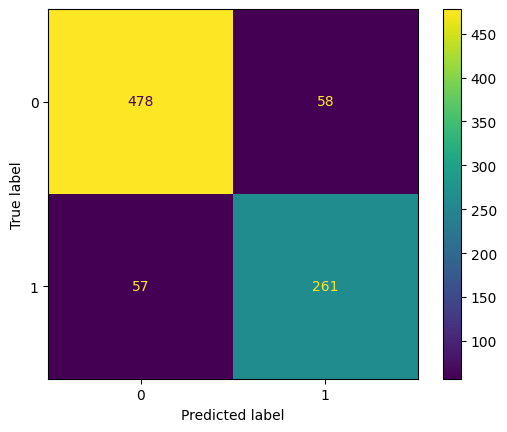

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(ytest,y_pred)

In [40]:
from sklearn.metrics import precision_score,recall_score,f1_score
print("precision",precision_score(ytest,y_pred))
print("recall",recall_score(ytest,y_pred))
print("f1score",f1_score(ytest,y_pred))

precision 0.8181818181818182
recall 0.8207547169811321
f1score 0.8194662480376766
